<a href="https://colab.research.google.com/github/adrinorosario/mnist-computer-vision/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Computer Vision

In [ ]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

In [ ]:
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.6.0.dev20241227
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [ ]:
# Import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0.dev20241227
0.22.0.dev20241227


## 1. Getting the FashionMNIST dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [ ]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data", # where to load the data to
    train=True, # do we want the training dataset?
    download=True, # do we want to download it?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

# Set up testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

### Check input and output shapes of the data

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_class_names = test_data.classes
test_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx # gives a dictionary of different labels and their corresponding index
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
test_class_to_idx = test_data.class_to_idx
test_class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
torch.unique(train_data.targets)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### Visulalize the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot: 9')

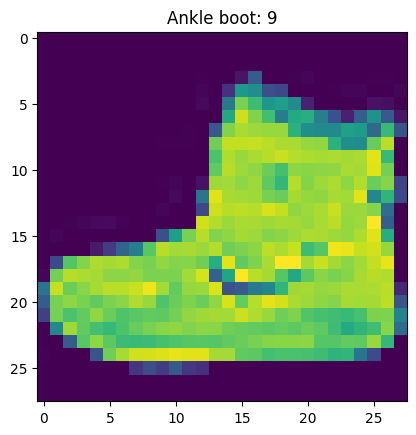

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(f"{class_names[label]}: {label}")

Text(0.5, 1.0, 'Ankle boot: 9')

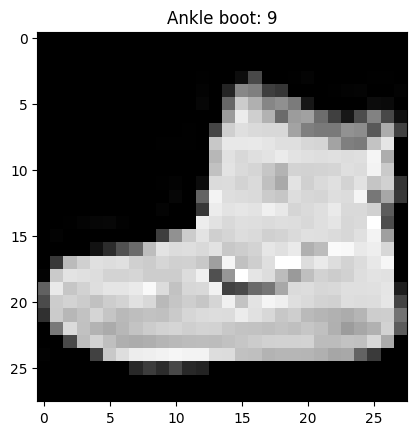

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}: {label}")

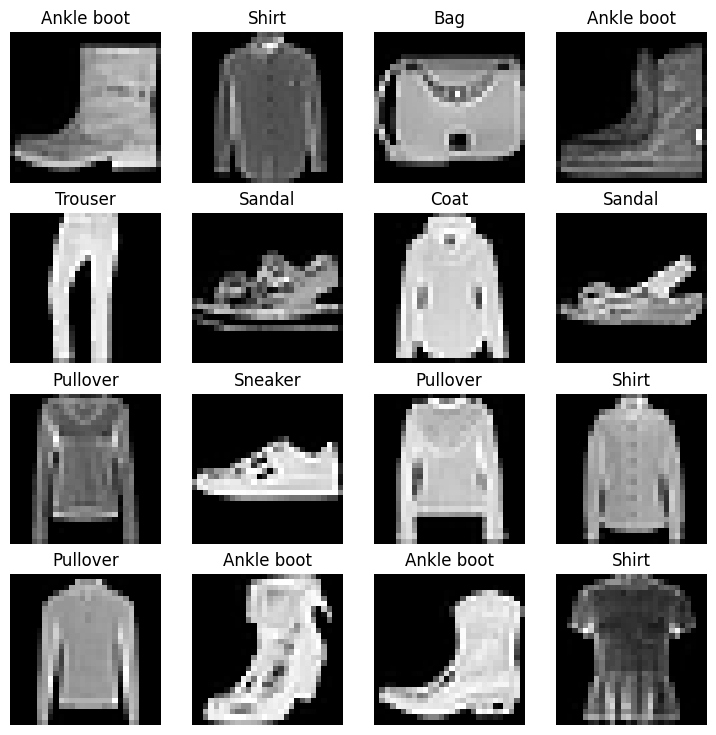

In [ ]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(f"{class_names[label]}")

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Can these images of clothing items be modelled with pure linear lines or do we need non-linearity?

## 2. Prepare DataLoader

Right now, our data is in the form of pytorch tensors.

DataLoader turns our datasets into python iterables.

More specifically, we want to turn our data into batches or mini batches

1. It is more computationally efficient, as in, your computing hardware may not be able to at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our nerual network more chances to update its gradients per epoch.


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
from torch.utils.data import DataLoader

# Setup batch-size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x317b5f4d0>,
 <torch.utils.data.dataloader.DataLoader at 0x31c06d970>)

In [ ]:
print(f"Dataloaders: {train_data_loader}, {test_data_loader}")
print(f"Length of train_data_loader: {len(train_data_loader)} batches of {BATCH_SIZE}")
print(f"Length of test_data_loader: {len(test_data_loader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x317b5f4d0>, <torch.utils.data.dataloader.DataLoader object at 0x31c06d970>
Length of train_data_loader: 1875 batches of 32
Length of test_data_loader: 313 batches of 32


In [ ]:
60000/32, 10000/32

(1875.0, 312.5)

In [ ]:
# Check what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
test_features_batch, test_labels_batch = next(iter(test_data_loader))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: Bag, Label size: torch.Size([])


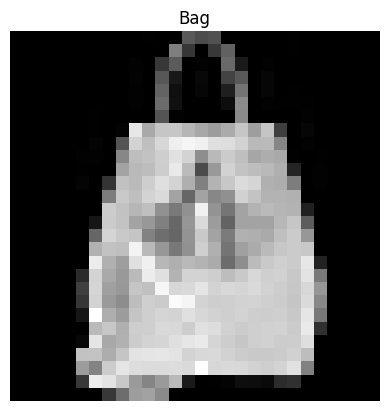

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {class_names[label]}, Label size: {label.shape}")

## Model 0: Create a baseline model

When starting to build a series of machine learning modelling experiments, it is best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words, start simple and add complexity when necessary.

In [ ]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f"Shape of x before flattening: {x.shape} -> [color channels, height, width]")

# Flatten the sample
output = flatten_model(x) # perform forward pass
print(f"Shape of x after flattening: {output.shape} -> [color channels, height*width]")

Shape of x before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape of x after flattening: torch.Size([1, 784]) -> [color channels, height*width]


In [ ]:
28*28

784

In [ ]:
# no non-linearities, 2 layers
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flattens the external dimensions of the input -> combines it into a vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10, # units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
device

'mps'

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='mps:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='mps:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1

### Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multiclass data, our loss function will be `nn.CrossEntropyLoss()`.
* Optimizer - our optimizer will be `torch.optim.Adam()`
* Evaluation metric - since we're working on a multiclass problem, we'll use accuracy as our evaluation metric


In [ ]:
# # Calculate accuracy
# def accuracy_fn(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item() # calculated whether two tensors are eqaual
#   acc = (correct / len(y_pred)) * 100
#   return acc

In [ ]:
import requests
from pathlib import Path

# download helper functions from https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as file:
    file.write(request.content) # write the contents of the file

helper_functions.py already exists, skipping download...


In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

In [ ]:
# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

> The opitmizer will update a model's parameters once per batch rather than once per epoch (see below in the training and test loop)





### Create function to time our experiments

Machine learning is very experimental. Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs


In [ ]:
import time

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
  Prints the amount of time it took a model to complete training. Output format in seconds.
  elapsed_time = end - start
  """
  elapsed_time = end - start
  print(f"Train time on {device}: {elapsed_time: .3f} seconds")
  return elapsed_time

In [ ]:
start = time.time()
x = 0;
for i in range(1, 10000000):
  x += 1
end = time.time()
print_train_time(start=start, end=end, device="cpu")

Train time on cpu:  0.546 seconds


0.5457940101623535

In [ ]:
len(train_data_loader), len(test_data_loader)

(1875, 313)

In [ ]:
train_features_batch.shape, len(train_features_batch)

(torch.Size([32, 1, 28, 28]), 32)

In [ ]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data_loader.dataset)

60000

### Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**
4. Print out what is happening
5. Time it all

In [ ]:
next(model_0.parameters()).device

device(type='mps', index=0)

In [ ]:
device

'mps'

In [ ]:
from tqdm.auto import tqdm

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_mps = time.time()

model_0 = model_0.to(device)

# Set the number of epochs(keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")

  ### Training
  train_loss = 0

  # Add a loop to loop through training batches
  for batch, (image, label) in enumerate(train_data_loader):
    """ in convention, you write it as (X, y) as the train_data_loader
    comes in a batches of features and their corresponding labels"""
    model_0.train()
    image, label = image.to(device), label.to(device)
    # 1. Forward pass
    y_pred = model_0(image)

    # 2. Calculate the loss(per batch)
    loss = loss_fn(y_pred, label)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step() # updates the model parameters once per batch rather than once per epoch

    # Print out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(image)}/{len(train_data_loader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_data_loader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_data_loader:
      # 1. Forward pass
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)
      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)
      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calcuate the test loss average per batch
    test_loss /= len(test_data_loader)

    # Calculate test accuracy average per batch
    test_acc /= len(test_data_loader)

  # Print what is happening
  print(f"\nTrain loss: {train_loss: .4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc: .4f}")

# Calculate training time
train_time_end_on_mps = time.time()
total_train_time_model_0 = print_train_time(start=train_time_start_on_mps,
                                            end=train_time_end_on_mps,
                                            device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.5900 | Test loss:  0.5172, Test acc:  82.0986
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4751 | Test loss:  0.4772, Test acc:  83.1569
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4541 | Test loss:  0.5117, Test acc:  81.7792
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0066,  ..., -0.0079,  0.0038,  0.0158],
        [-0.0190, -0.0354,  0.0163,  ...,  0.0209,  0.0140,  0.0121],
        [-0.0008,  0.0021,  0.0032,  ...,  0.0225, -0.0133,  0.0079],
        ...,
        [-0.0116,  0.0275, -0.0321,  ...,  0.0603,  0.0514, 

### Make predictions and get baseline model results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  model.to(device)
  loss, acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      y_pred = model(X)

      # Accumulate loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_data_loader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device=device)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.511709988117218,
 'model_acc': 81.77915335463258}

## Setup device agnostic code (for using GPU if there is one)

In [ ]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


## Building a model (model_1) with non-linearity

We learned about the power of non-linearity in classifying non-linear data. Through the power of linear and non-linear functions, neural networks can classify any data when paired in the right pair.



### Create model_1

In [ ]:
### Build model_1 with non-linearity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.non_linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.non_linear_stack(x)

In [ ]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [ ]:
device

'mps'

In [ ]:
model_1 = FashionMNISTModelV1(
    input_shape=784, # this is the output of the flatten after the 28*28 image goes in
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_1

FashionMNISTModelV1(
  (non_linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_0.parameters()).device

device(type='mps', index=0)

In [ ]:
next(model_1.parameters()).device

device(type='mps', index=0)

### Setup loss function, optimizer and accuracy metrics

In [ ]:
# Loss function and optimizer for model_1
loss_fn1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(params=model_1.parameters(),
                              lr=0.1)

loss_fn1, optimizer1

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Functionizing training and evaluating/testing loop

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
device

'mps'

In [ ]:
test_data_loader, train_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x31c06d970>,
 <torch.utils.data.dataloader.DataLoader at 0x317b5f4d0>)

In [ ]:
def train_step(model: nn.Module,
                device: torch.device,
                loss_fn: nn.Module,
                optimizer: torch.optim,
                dataloader: torch.utils.data.DataLoader,
                accuracy_fn):
  """Performs a training loop step on model going over dataloader."""

  # set the model to training mode
  model.train()

  train_loss, train_acc = 0, 0

  # iterate over the batches and the (image, labels) from the train_data_loader
  for batch, (X_train, y_train) in enumerate(dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    y_preds = model(X_train)

    loss = loss_fn(y_preds, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y_train,
                             y_pred=y_preds.argmax(dim=1))

    optimizer.zero_grad() # set gradients to zero
    loss.backward() # perform back propagation
    optimizer.step() # step the optimizer

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Training loss: {train_loss: .4f} | Training acc: {train_acc: .2f}%")


In [ ]:
def test_step(model: nn.Module,
              device: torch.device,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn):
  """Performs a testing loop step on model going over dataloader."""

  # set the test loss and accuracy
  test_loss, test_acc = 0, 0

  model.eval() # set model to evaluation/testing mode
  with torch.inference_mode():

    # load the test features and labels from the test_data_loader
    for X_test, y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model(X_test)

      loss = loss_fn(test_pred, y_test)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y_test,
                               y_pred=test_pred.argmax(dim=1))

    # find the test loss and accuracy
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss: .4f}, Test acc: {test_acc: .2f}%\n")

In [ ]:
next(model_1.parameters()).device

device(type='mps', index=0)

In [ ]:
torch.manual_seed(42)

""" when initially running this notebook for the first time or after it has been disconnected, set the epochs to a value more than
60 and run"""
# measure the training time
start_train_time_on_gpu = time.time()

# set epochs
epochs = 40

# create an optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}...\n")
  train_step(model=model_1,
             device=device,
             loss_fn=loss_fn1,
             optimizer=optimizer1,
             dataloader=test_data_loader,
             accuracy_fn=accuracy_fn)

  test_step(model=model_1,
            device=device,
            dataloader=test_data_loader,
            loss_fn=loss_fn1,
            accuracy_fn=accuracy_fn)

stop_train_time_on_gpu = time.time()

total_train_time_for_model_1 = print_train_time(start=start_train_time_on_gpu,
                                                end=stop_train_time_on_gpu,
                                                device=device)

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 0...

Training loss:  1.2579 | Training acc:  57.54%
Test loss:  0.9869, Test acc:  60.98%

Epoch: 1...

Training loss:  0.8880 | Training acc:  68.03%
Test loss:  0.8772, Test acc:  66.32%

Epoch: 2...

Training loss:  0.8183 | Training acc:  70.78%
Test loss:  0.7334, Test acc:  74.84%

Epoch: 3...

Training loss:  0.6131 | Training acc:  78.90%
Test loss:  0.5576, Test acc:  79.08%

Epoch: 4...

Training loss:  0.5467 | Training acc:  80.49%
Test loss:  0.5322, Test acc:  79.68%

Epoch: 5...

Training loss:  0.5194 | Training acc:  81.69%
Test loss:  0.5080, Test acc:  80.63%

Epoch: 6...

Training loss:  0.4994 | Training acc:  82.38%
Test loss:  0.4968, Test acc:  80.77%

Epoch: 7...

Training loss:  0.4851 | Training acc:  82.84%
Test loss:  0.4859, Test acc:  81.11%

Epoch: 8...

Training loss:  0.4721 | Training acc:  83.11%
Test loss:  0.4752, Test acc:  81.52%

Epoch: 9...

Training loss:  0.4623 | Training acc:  83.42%
Test loss:  0.4661, Test acc:  82.04%

Epoch: 10.

In [ ]:
model_0_results, total_train_time_model_0

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.511709988117218,
  'model_acc': 81.77915335463258},
 11.464998960494995)

In [ ]:
model_1.to(device)

FashionMNISTModelV1(
  (non_linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
              device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      y_pred = model(X)

      # Accumulate loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model_0 results on test dataset
# model_1_results = eval_model(model=model_1,
#                              data_loader=test_data_loader,
#                              loss_fn=loss_fn1,
#                              accuracy_fn=accuracy_fn,
#                             device=device)

# model_1_results

In [ ]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


## Model 2: Building a Convolutional Neural Network

CNN's are also known as ConvNets.

CNNs are known for their capabilities to find patterns in visual data.

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # create a conv layer
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # first cnn layer
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves (hyperparameters) for Conv2d -> Conv2d for 2 dimensional data(images)
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        #Seeing the output of conv_block_2, you should be able to adjust the classifier's in features.  The trick is to see the output shape or the outputs of the previous layer and adjust the  in_features of the classifier layer here accordingly.
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
device

'mps'

In [ ]:
image.shape

torch.Size([32, 1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor2 = rand_image_tensor
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model_2
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='mps:0', grad_fn=<LinearBackward0>)

### Stepping through `nn.Conv2d`



In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64)) # (batch_size, color_channels, height, width)
test_image = images[0]


print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)

# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10, # equivalent to the number of hidden_units you have
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))

### Stepping through `nn.MaxPool2d`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}\n")

# Create sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data just through the conv_layer
test_image_through_conv_layer = conv_layer(test_image.unsqueeze(dim=0))
print(f"test_image shape after passing throught conv_layer(): {test_image_through_conv_layer.shape}")

# Pass data through max_pool_layer
test_image_through_conv_and_maxpool_layer = max_pool_layer(test_image_through_conv_layer)
print(f"test_image shape after passing through max_pool_layer(): {test_image_through_conv_and_maxpool_layer.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])

test_image shape after passing throught conv_layer(): torch.Size([1, 10, 62, 62])
test_image shape after passing through max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)

# Create a random tensor
random_tensor = torch.randn(size=(1,1,2,2)) # (batch_size, color_channels, height, width)

# Create a MaxPool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
# Pass the random_tensor through max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"Shape of random tensor: {random_tensor.shape}")
print(f"Shape of random tensor after passing it through max_pool_layer(): {max_pool_tensor.shape}\n")
print(f"random_tensor: {random_tensor}\n")
print(f"max_pool_tensor: {max_pool_tensor}")

Shape of random tensor: torch.Size([1, 1, 2, 2])
Shape of random tensor after passing it through max_pool_layer(): torch.Size([1, 1, 1, 1])

random_tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

max_pool_tensor: tensor([[[[0.3367]]]])


In [ ]:
max_pool_tensor.squeeze()

tensor(0.3367)

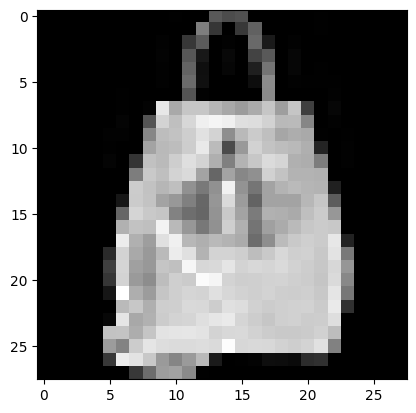

In [ ]:
plt.imshow(img.squeeze(), cmap='gray') # FashionMNIST image

### Setup loss function and optimizer for `model_2`

In [ ]:
# Setup loss funciton, optimizer and accuracy metrics
loss_fn2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

### Training and testing `model_2` using train_step() and test_step()

In [ ]:
torch.manual_seed(42)
# Train the model
epochs = 10

start_train_time_model2 = time.time()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  train_step(model=model_2,
             device=device,
             dataloader=train_data_loader,
             loss_fn=loss_fn2,
             optimizer=optimizer2,
             accuracy_fn=accuracy_fn)

  test_step(model=model_2,
            device=device,
            dataloader=test_data_loader,
            loss_fn=loss_fn2,
            accuracy_fn=accuracy_fn)

stop_train_time_model2 = time.time()

total_train_time_model_2 = print_train_time(start=start_train_time_model2,
                                            end=stop_train_time_model2,
                                            device=device)
total_train_time_model_2

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---
Training loss:  0.5937 | Training acc:  78.43%
Test loss:  0.4065, Test acc:  85.56%

Epoch: 1
---
Training loss:  0.3537 | Training acc:  87.42%
Test loss:  0.3373, Test acc:  87.83%

Epoch: 2
---
Training loss:  0.3171 | Training acc:  88.55%
Test loss:  0.3155, Test acc:  88.62%

Epoch: 3
---
Training loss:  0.2996 | Training acc:  89.22%
Test loss:  0.3261, Test acc:  87.87%

Epoch: 4
---
Training loss:  0.2877 | Training acc:  89.45%
Test loss:  0.2976, Test acc:  89.53%

Epoch: 5
---
Training loss:  0.2779 | Training acc:  89.88%
Test loss:  0.3360, Test acc:  87.78%

Epoch: 6
---
Training loss:  0.2722 | Training acc:  90.05%
Test loss:  0.2879, Test acc:  89.60%

Epoch: 7
---
Training loss:  0.2659 | Training acc:  90.29%
Test loss:  0.2879, Test acc:  90.01%

Epoch: 8
---
Training loss:  0.2608 | Training acc:  90.62%
Test loss:  0.2804, Test acc:  89.71%

Epoch: 9
---
Training loss:  0.2564 | Training acc:  90.60%
Test loss:  0.3176, Test acc:  88.48%

Train time

87.91211795806885

In [ ]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_data_loader,
                             loss_fn=loss_fn2,
                             accuracy_fn=accuracy_fn,
                            device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3176276981830597,
 'model_acc': 88.47843450479233}

## Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.511710,81.779153
1,FashionMNISTModelV1,0.362951,85.872604
2,FashionMNISTModelV2,0.317628,88.478435


In [ ]:
compare_results["total_train_time"] = [
    total_train_time_model_0,
    total_train_time_for_model_1,
    total_train_time_model_2
]

compare_results

,model_name,model_loss,model_acc,total_train_time
0,FashionMNISTModelV0,0.511710,81.779153,11.464999
1,FashionMNISTModelV1,0.362951,85.872604,46.698071
2,FashionMNISTModelV2,0.317628,88.478435,87.912118


Text(0, 0.5, 'model')

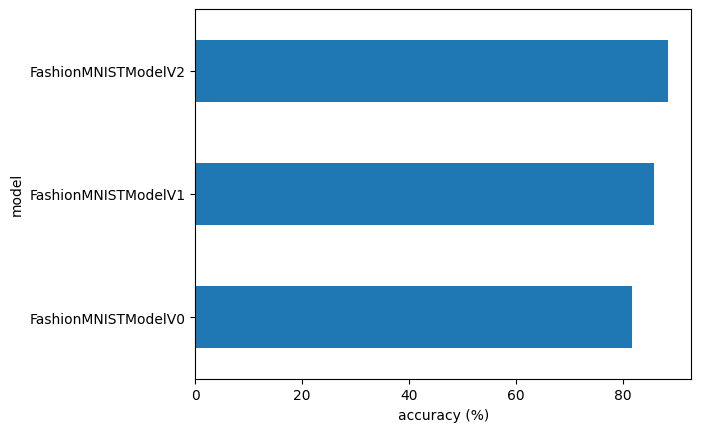

In [ ]:
# Visualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and evaluate random predictions using the best model

In [ ]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the data (add a batch dimension with unsqueeze and pass to device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get the prediction probability : logit -> pred_prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the GPU for futher calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=50): # randomly sampling 50 samples (k=50)
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

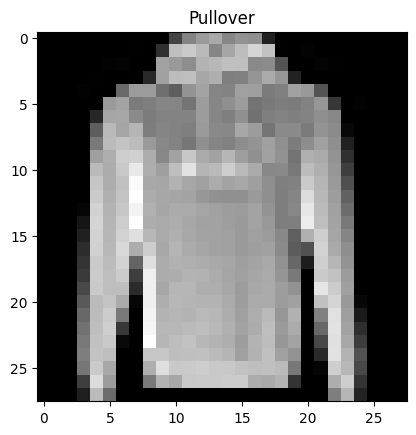

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
len(test_samples)

50

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[1.7827e-04, 7.8692e-06, 8.8933e-01, 9.5238e-04, 1.0870e-01, 2.4946e-07,
         8.2562e-04, 3.6476e-06, 4.7765e-06, 8.3875e-07],
        [1.5384e-02, 2.7482e-04, 8.9498e-01, 3.3327e-03, 1.1495e-02, 4.6381e-05,
         7.4353e-02, 2.5423e-06, 5.0987e-05, 7.8708e-05]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 3, 7, 9, 4, 3, 0, 0, 2, 1, 9, 3, 4, 5, 5, 4, 2, 7, 3, 9, 5, 9, 0,
        4, 7, 0, 5, 7, 7, 6, 1, 3, 6, 3, 4, 6, 5, 3, 9, 1, 4, 6, 8, 3, 8, 0, 4,
        8, 9])

In [ ]:
test_labels

[2,
 2,
 3,
 7,
 9,
 2,
 3,
 0,
 0,
 2,
 1,
 9,
 8,
 4,
 5,
 5,
 6,
 2,
 7,
 3,
 7,
 5,
 9,
 0,
 0,
 7,
 0,
 5,
 7,
 9,
 6,
 1,
 3,
 6,
 3,
 4,
 6,
 5,
 3,
 9,
 1,
 2,
 6,
 8,
 1,
 8,
 0,
 3,
 8,
 9]

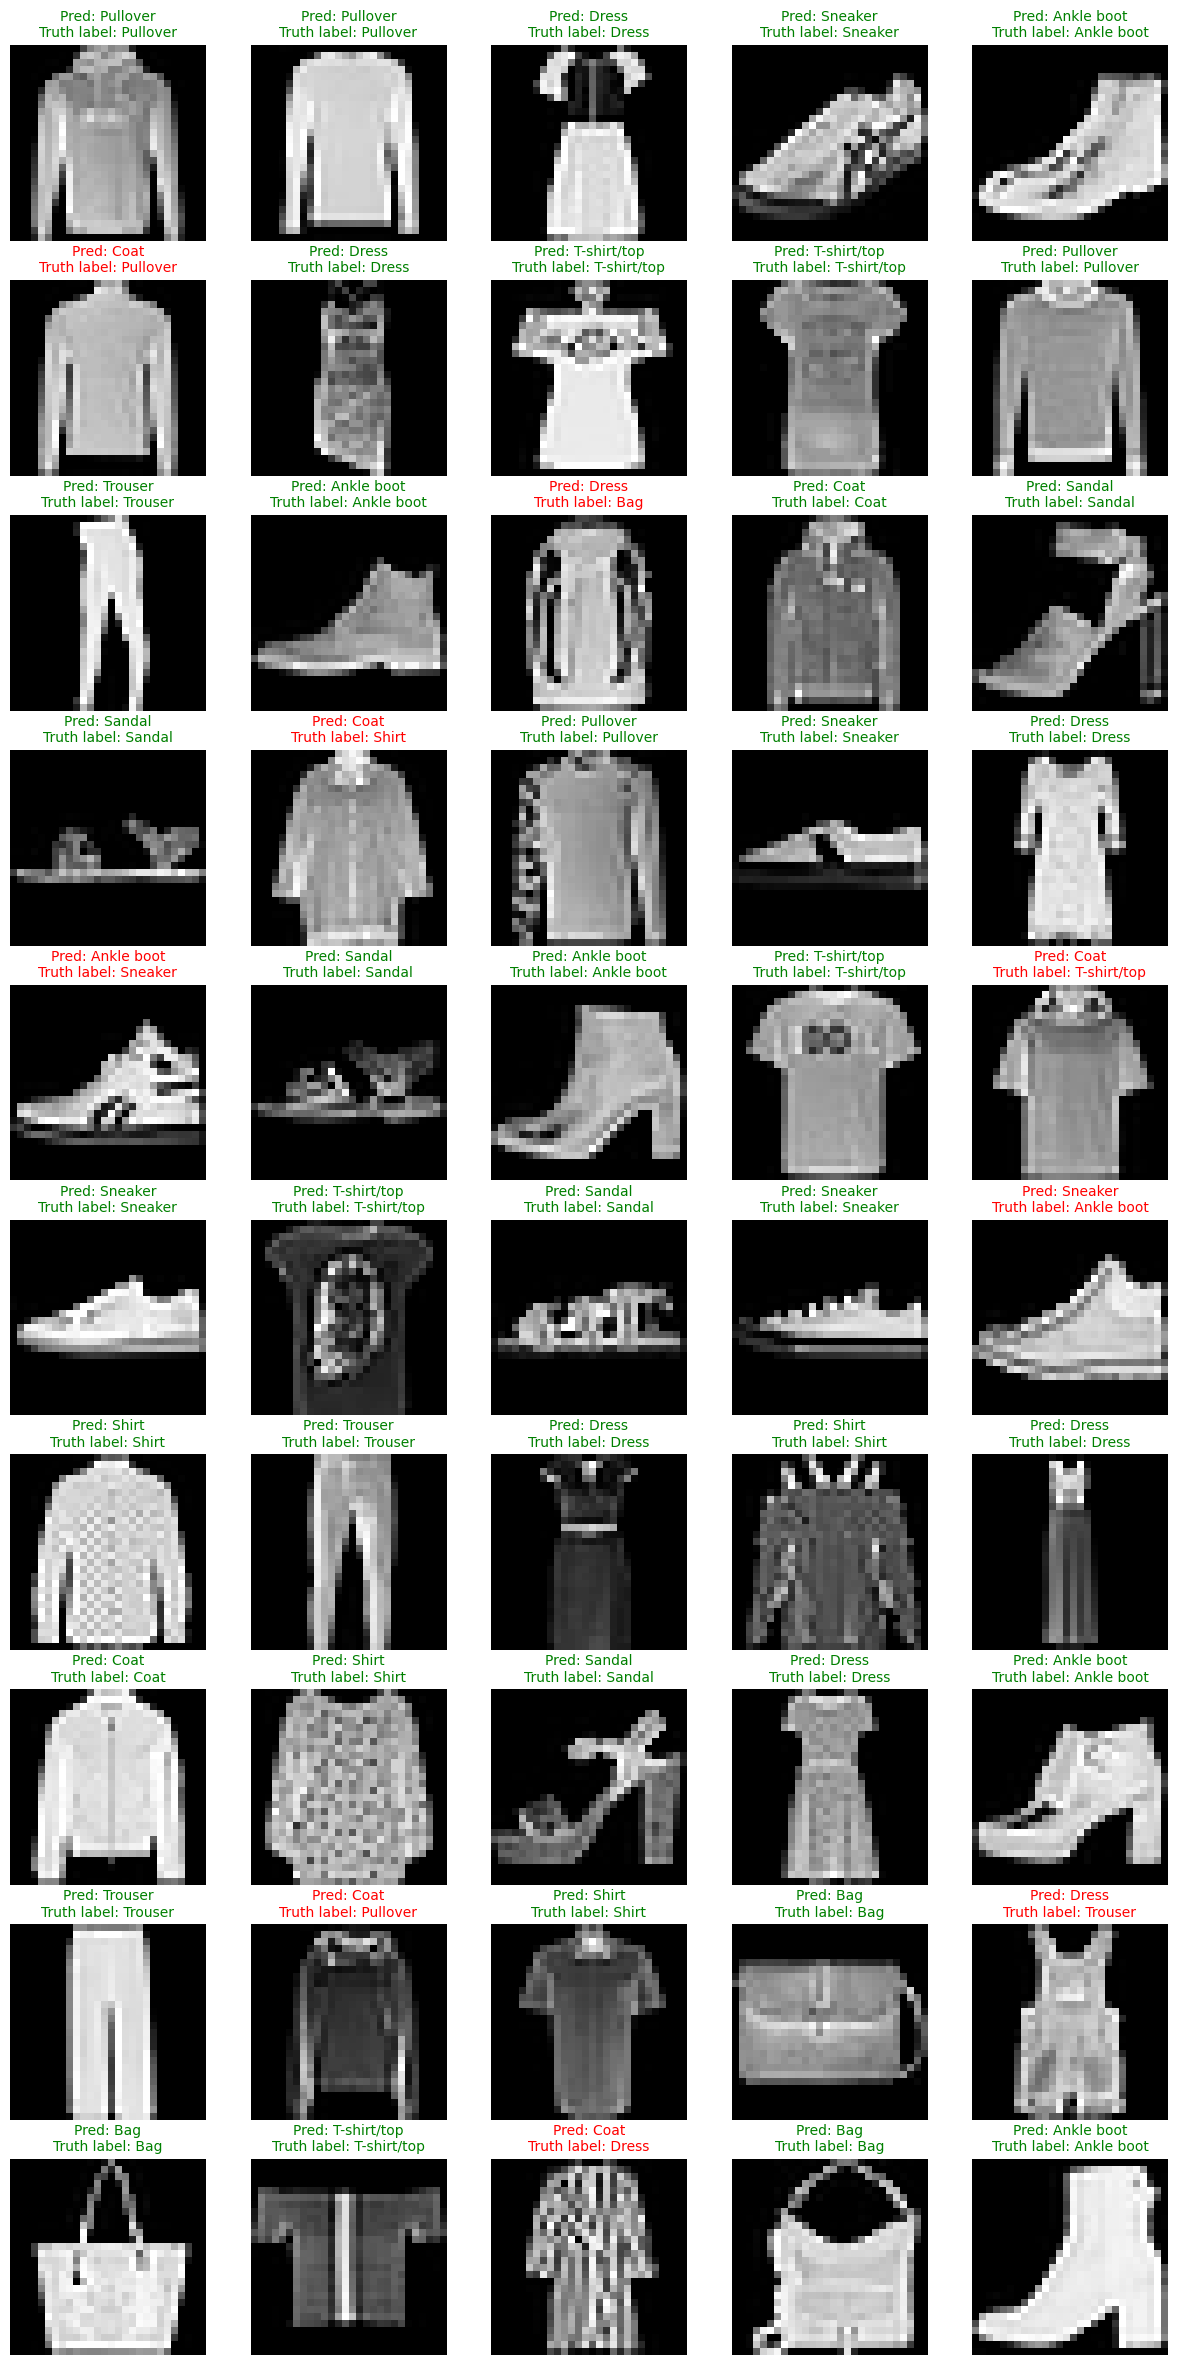

In [ ]:
# Plot predictions
plt.figure(figsize=(15, 30))
nrows = 10
ncols = 5
for i, sample in enumerate(test_samples):
  # Create subplot for each sample
  plt.subplot(nrows, ncols, i+1)

  # plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find prediction label in text form
  pred_label = class_names[pred_classes[i]]

  # get truth label in text form
  truth_label = class_names[test_labels[i]]

  # create a title
  title_text = f"Pred: {pred_label}\nTruth label: {truth_label}"

  # check for equality b/w pred and truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## Making a confusion matrix for futher prediction and evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [ ]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_data_loader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1) # logits -> pred_probs -> pred labels
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 3,  ..., 3, 1, 2])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be >= 19")
except:
  !pip install -q torchmetrics -U mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.3
mlxtend version: 0.23.3


In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

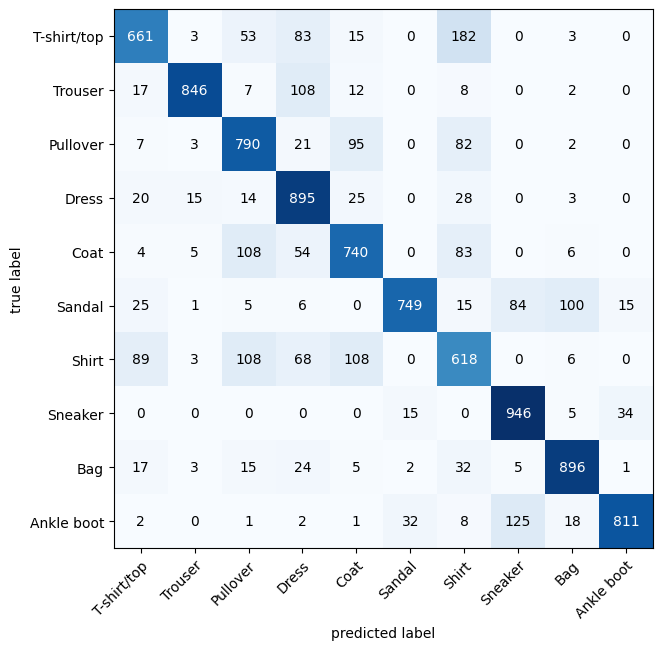

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. set up confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. plot confusion matrix
fig, axis = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(7,7)
)

## Save and load best performing model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME="pytorch_model_2.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/pytorch_model_2.pt')

In [ ]:
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

# Overfitting in machine learning

In simple terms, **overfitting** refers to a situation when a model has memorized or mapped or fitted the training data so perfectly and exactly such that it is not able to fit new data or predict on new data (maybe testing data or the real world).

> *A situation where the model is extremely useful in the lab (training environment) but useless in the real world.*

**Generalization** is the opposite of overfitting. Generalization refers to the process where the model learns to predict on training data well enough that it is able to make accurate or close-to-accurate predictions on new data and performs well in the real world.

## Ways to prevent overfitting

1. **Train with more data** - Using a large volume of data will ensure that there is enough opportunity for your data to map the relationship between input and output variables and generalize well. However, the data needs to be clean.

2. **Early stopping** - This process involves monitoring the training cycle or iterations of your model and stopping or pausing the process before the model starts to learn the noise or overfit (in other words, memorize the training data). However, early stopping also risks underfitting.

3. **Data Augmentation** - This process involves creating new data using the already existing data. Although clean data is recommended, it is very expensive to obtain. This method can incorporate noise to ensure the models learn well and have more oppotunities for generalization.

## MNIST Dataset

1. Load the torchvision.datasets.MNIST() train and test datasets.
2. Visualize at least 5 different samples of the MNIST training dataset.
3. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
mnist_train = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

mnist_test = datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [ ]:
class_names = mnist_train.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
torch.unique(mnist_test.targets)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
image, label = mnist_train[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

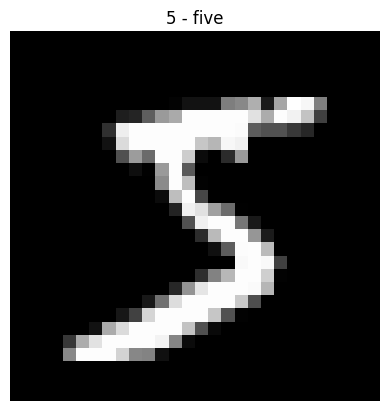

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

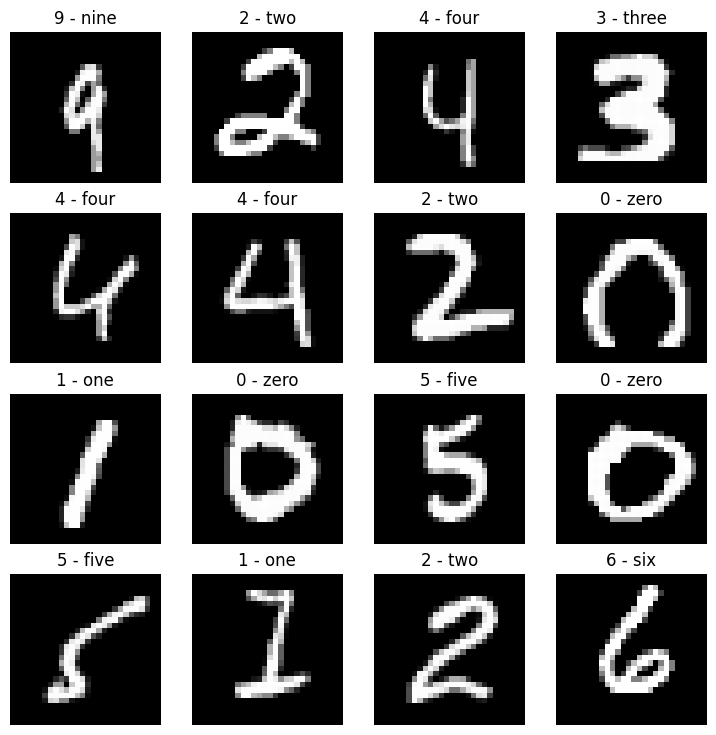

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 4
ncols = 4

for i in range(1, nrows*ncols+1):
  random_idx = torch.randint(0, len(mnist_train), size=[1]).item()
  image, label = mnist_train[random_idx]
  plt.subplot(nrows, ncols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

### Turn train and test datasets into dataloaders

Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
mnist_train_dataloader = DataLoader(dataset=mnist_train,
                                    batch_size=32,
                                    shuffle=True)
mnist_test_dataloader = DataLoader(dataset=mnist_test,
                                   batch_size=32,
                                   shuffle=False)

In [ ]:
len(mnist_train_dataloader), len(mnist_test_dataloader)
train_features_batch, train_labels_batch = next(iter(mnist_train_dataloader))
print(f"Shape of train features: {train_features_batch.shape}")
print(f"Shape of train labels: {train_labels_batch.shape}")

Shape of train features: torch.Size([32, 1, 28, 28])
Shape of train labels: torch.Size([32])


In [ ]:
28*28

784

### Build a model

In [ ]:
class MNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=2,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=2,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=2,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=2,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*100,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)
    return x

In [ ]:
mnist_m1 = MNISTModelV1(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)
mnist_m1

MNISTModelV1(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=10, bias=True)
  )
)

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=mnist_m1.parameters(),
                            lr=0.1)

### Train model

In [ ]:
torch.manual_seed(42)
epochs = 10

start_train_time = time.time()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} ---")
  train_step(model=mnist_m1,
             device=device,
             loss_fn=loss,
             optimizer=optimizer,
             dataloader=mnist_train_dataloader,
             accuracy_fn=accuracy_fn)

  test_step(model=mnist_m1,
            device=device,
            dataloader=mnist_test_dataloader,
            loss_fn=loss,
            accuracy_fn=accuracy_fn)

stop_train_time = time.time()

mnist_m1_train_time = print_train_time(start=start_train_time,
                                       end=stop_train_time,
                                       device=device)

mnist_m1_train_time

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 ---
Training loss:  0.2926 | Training acc:  90.24%
Test loss:  0.0826, Test acc:  97.39%

Epoch: 1 ---
Training loss:  0.0753 | Training acc:  97.68%
Test loss:  0.0748, Test acc:  97.39%

Epoch: 2 ---
Training loss:  0.0584 | Training acc:  98.19%
Test loss:  0.0470, Test acc:  98.43%

Epoch: 3 ---
Training loss:  0.0510 | Training acc:  98.44%
Test loss:  0.0593, Test acc:  97.94%

Epoch: 4 ---
Training loss:  0.0453 | Training acc:  98.59%
Test loss:  0.0439, Test acc:  98.48%

Epoch: 5 ---
Training loss:  0.0398 | Training acc:  98.73%
Test loss:  0.0396, Test acc:  98.65%

Epoch: 6 ---
Training loss:  0.0365 | Training acc:  98.87%
Test loss:  0.0386, Test acc:  98.65%

Epoch: 7 ---
Training loss:  0.0334 | Training acc:  98.98%
Test loss:  0.0396, Test acc:  98.75%

Epoch: 8 ---
Training loss:  0.0313 | Training acc:  98.98%
Test loss:  0.0375, Test acc:  98.73%

Epoch: 9 ---
Training loss:  0.0297 | Training acc:  99.05%
Test loss:  0.0387, Test acc:  98.70%

Train time

140.94220280647278

In [ ]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
mnist_test_results = eval_model(model=mnist_m1,
                               data_loader=mnist_test_dataloader,
                               loss_fn=loss,
                               accuracy_fn=accuracy_fn,
                               device=device)

mnist_test_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModelV1',
 'model_loss': 0.038657296448946,
 'model_acc': 98.7020766773163}

In [ ]:
mnist_test_samples = []
mnist_test_labels = []

for sample, label in random.sample(list(mnist_test), k=50):
  mnist_test_samples.append(sample)
  mnist_test_labels.append(label)

len(mnist_test_samples), len(mnist_test_labels)

(50, 50)

In [ ]:
mnist_pred_probs = make_predictions(model=mnist_m1,
                                    data=mnist_test_samples)
mnist_pred_classes = mnist_pred_probs.argmax(dim=1)
mnist_pred_classes

tensor([0, 8, 3, 2, 4, 8, 1, 6, 8, 3, 5, 1, 0, 2, 1, 6, 9, 8, 1, 7, 9, 3, 1, 4,
        3, 0, 7, 8, 0, 4, 4, 5, 4, 8, 8, 7, 5, 4, 4, 9, 8, 6, 6, 0, 2, 0, 2, 9,
        6, 3])

In [ ]:
mnist_test_labels

[0,
 8,
 3,
 2,
 4,
 8,
 1,
 6,
 8,
 3,
 5,
 1,
 0,
 2,
 1,
 6,
 9,
 8,
 1,
 7,
 9,
 3,
 1,
 4,
 3,
 0,
 7,
 8,
 0,
 4,
 4,
 5,
 4,
 8,
 8,
 7,
 5,
 4,
 4,
 9,
 8,
 6,
 0,
 0,
 2,
 0,
 2,
 9,
 6,
 3]

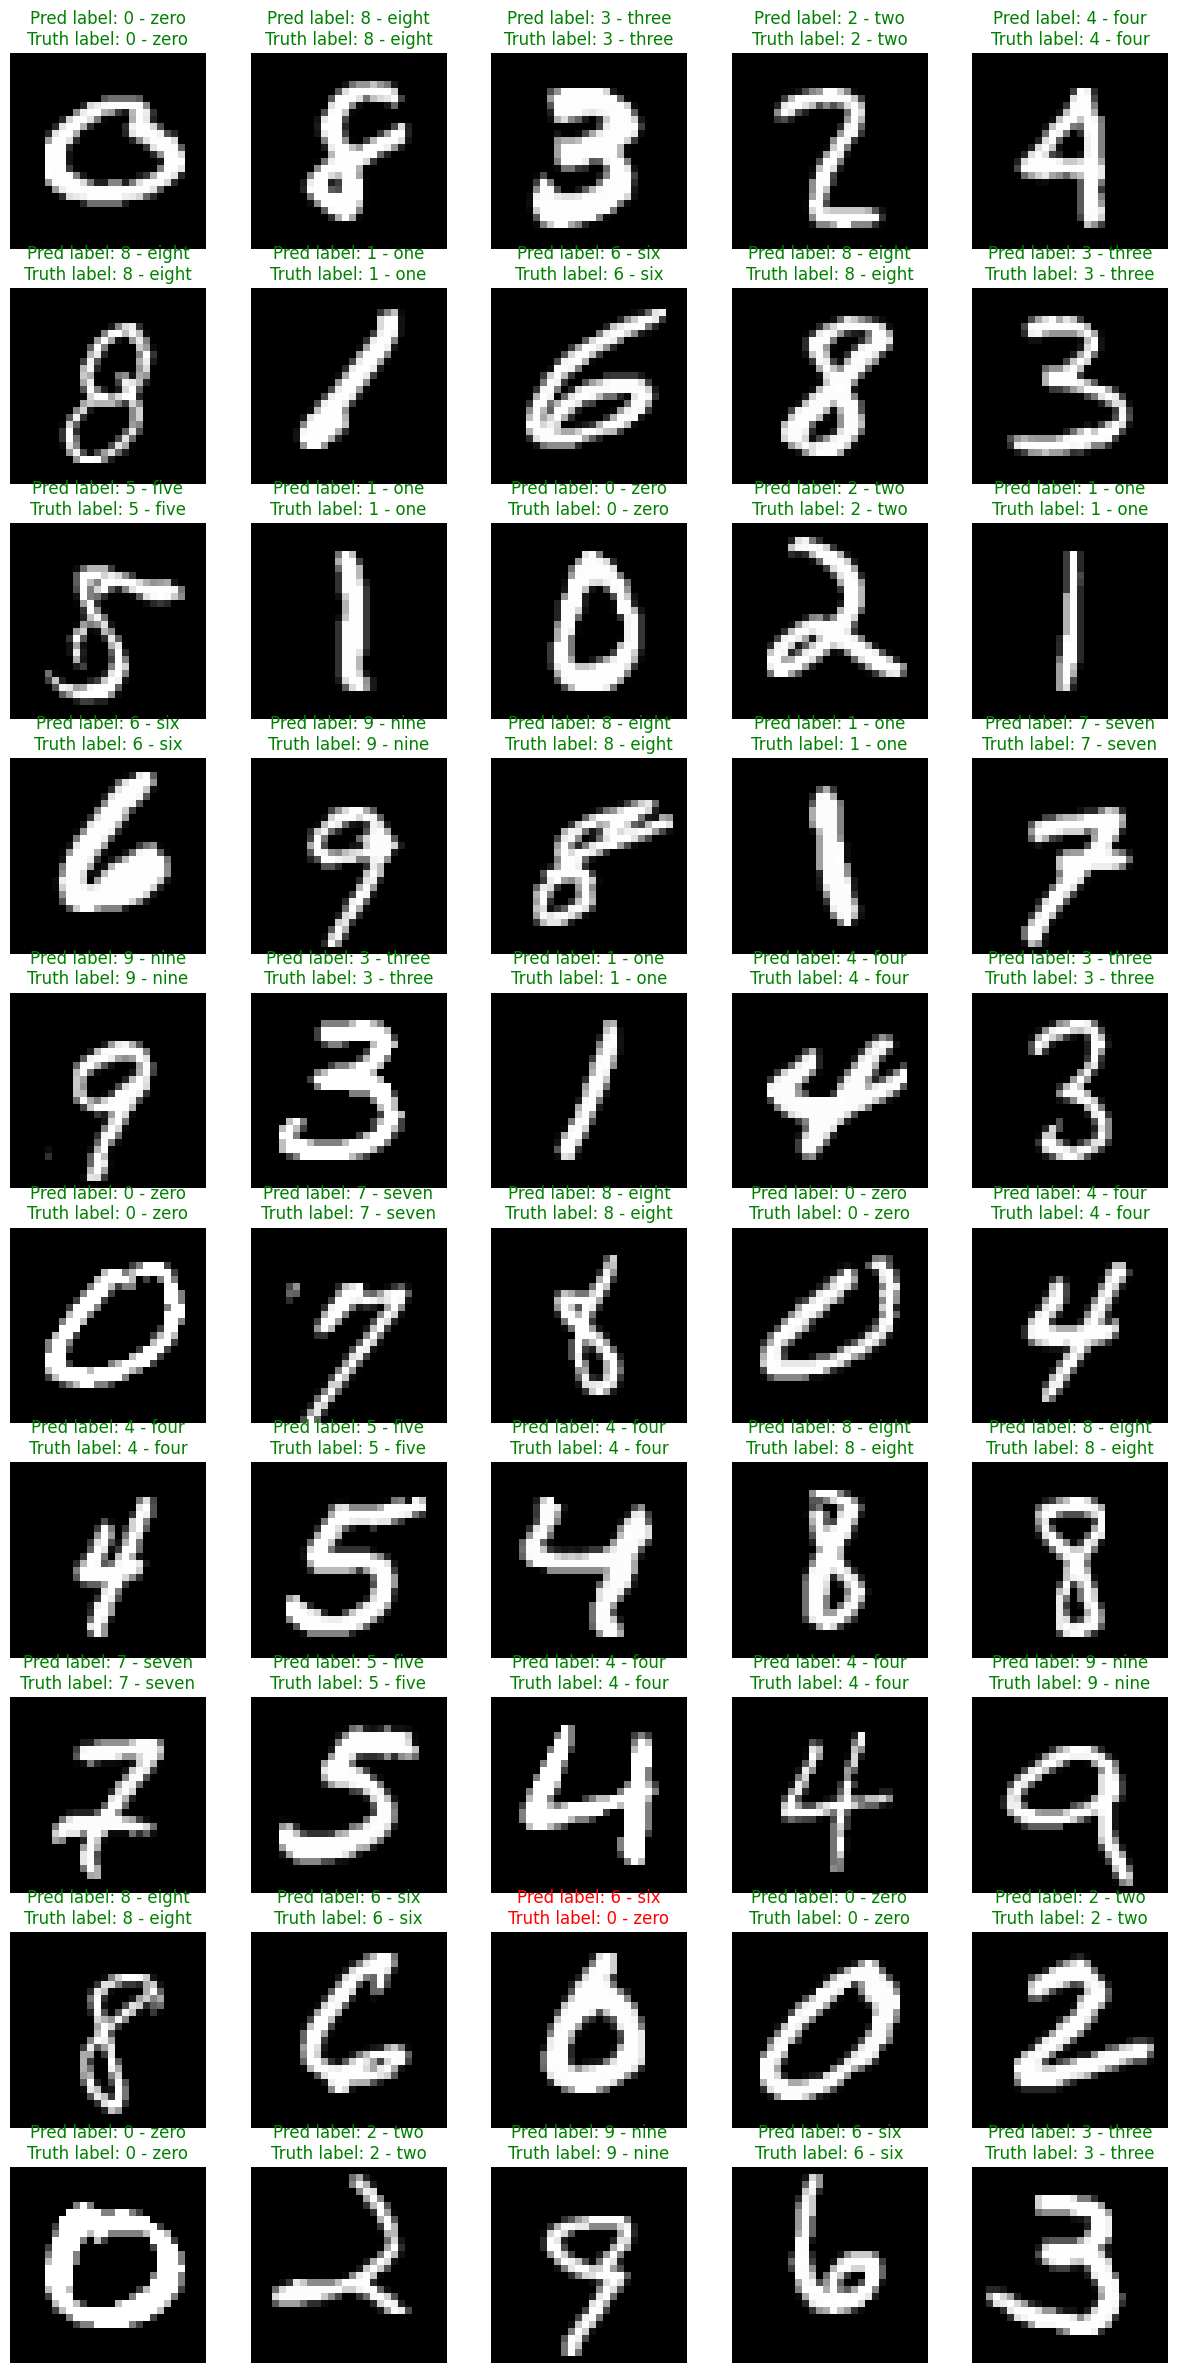

In [ ]:
nrows = 10
ncols = 5
plt.figure(figsize=(15, 30))

for i, sample in enumerate(mnist_test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[mnist_pred_classes[i]]
  truth_label = class_names[mnist_test_labels[i]]

  title_text = f"Pred label: {pred_label}\nTruth label: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, c="g")
  else:
    plt.title(title_text, c="r")

  plt.axis(False)

In [ ]:
y_preds = []
mnist_m1.eval()

with torch.inference_mode():
  for X, y in tqdm(mnist_test_dataloader):
    X, y = X.to(device), y.to(device)

    y_logits = mnist_m1(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)
len(y_preds_tensor)

  0%|          | 0/313 [00:00<?, ?it/s]

10000

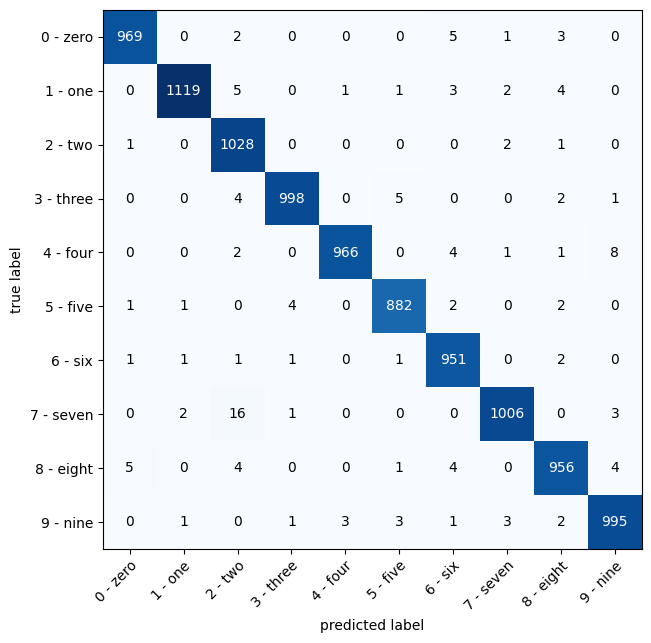

In [ ]:
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=mnist_test.targets)

plot, axis = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                      class_names=class_names,
                      figsize=(7, 7))

In [ ]:
x = torch.randn(size=[1, 3, 64, 64])
x.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
          out_channels=10,
          kernel_size=3,
          padding=0,
          stride=1)

out = conv_layer(x)
out.shape

torch.Size([1, 10, 62, 62])

In [ ]:
epochs = 3

start_time_mnist_on_fashionMNIST = time.time()

for epoch in tqdm(range(epochs)):
  train_step(model=mnist_m1,
             device=device,
             loss_fn=loss,
             optimizer=optimizer,
             dataloader=train_data_loader,
             accuracy_fn=accuracy_fn)

  test_step(model=mnist_m1,
            device=device,
            dataloader=test_data_loader,
            loss_fn=loss,
            accuracy_fn=accuracy_fn)

end_time_mnist_on_fashionMNIST = time.time()

total_time_mnist_on_fashionMNIST = print_train_time(start=start_time_mnist_on_fashionMNIST,
                                                    end=end_time_mnist_on_fashionMNIST,
                                                    device=device)

total_time_mnist_on_fashionMNIST

  0%|          | 0/3 [00:00<?, ?it/s]

Training loss:  0.4756 | Training acc:  82.97%
Test loss:  0.3921, Test acc:  86.19%

Training loss:  0.3458 | Training acc:  87.45%
Test loss:  0.3678, Test acc:  87.07%

Training loss:  0.3136 | Training acc:  88.73%
Test loss:  0.3381, Test acc:  88.05%

Train time on mps:  41.163 seconds


41.162827014923096

In [ ]:
mnist_on_mnist_results = eval_model(model=mnist_m1,
                                    data_loader=mnist_test_dataloader,
                                    loss_fn=loss,
                                    accuracy_fn=accuracy_fn,
                                   device=device)

mnist_on_fashionMNIST_results = eval_model(model=mnist_m1,
                                           data_loader=test_data_loader,
                                           loss_fn=loss,
                                           accuracy_fn=accuracy_fn,
                                          device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
mnist_on_mnist_results

{'model_name': 'MNISTModelV1',
 'model_loss': 5.684975624084473,
 'model_acc': 15.025958466453675}

In [ ]:
mnist_on_fashionMNIST_results

{'model_name': 'MNISTModelV1',
 'model_loss': 0.3380584120750427,
 'model_acc': 88.0491214057508}

## Getting the EMNIST Dataset

EMNIST is the extended version of the MNIST Dataset

### Load the dataset

In [ ]:
train_dataset = datasets.EMNIST(root="data",
                                split="byclass",
                                train=True,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

test_dataset = datasets.EMNIST(root="data",
                               split="byclass",
                               train=False,
                               download=True,
                               transform=ToTensor(),
                               target_transform=None)

In [ ]:
train_dataset, test_dataset

(Dataset EMNIST
     Number of datapoints: 697932
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset EMNIST
     Number of datapoints: 116323
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([1, 28, 28]), 35)

In [ ]:
len(train_dataset), len(test_dataset)

(697932, 116323)

### Visualize data

In [ ]:
train_class_names = train_dataset.classes
test_class_names = test_dataset.classes

len(train_class_names), len(test_class_names)

(62, 62)

In [ ]:
train_targets = train_dataset.targets
test_targets = test_dataset.targets

torch.eq(torch.unique(train_targets), torch.unique(test_targets))

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True])

In [ ]:
len(torch.unique(train_targets)) == len(torch.unique(test_targets))

True

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

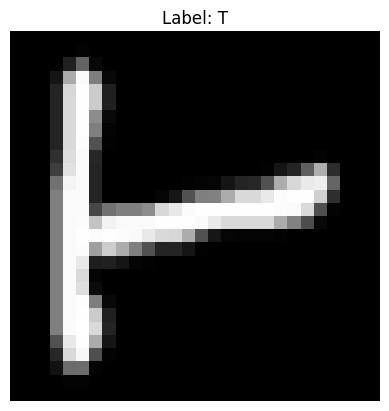

In [ ]:
image, label = train_dataset[4214]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {train_class_names[label]}")
plt.axis(False)

At first glance, no one would first recognize this as the letter 'T' without referring to the label name.

Now, let's plot different samples from the training dataset. We will plot 9 different samples from the train set at random, utilizing matplotlib's subplot figure.

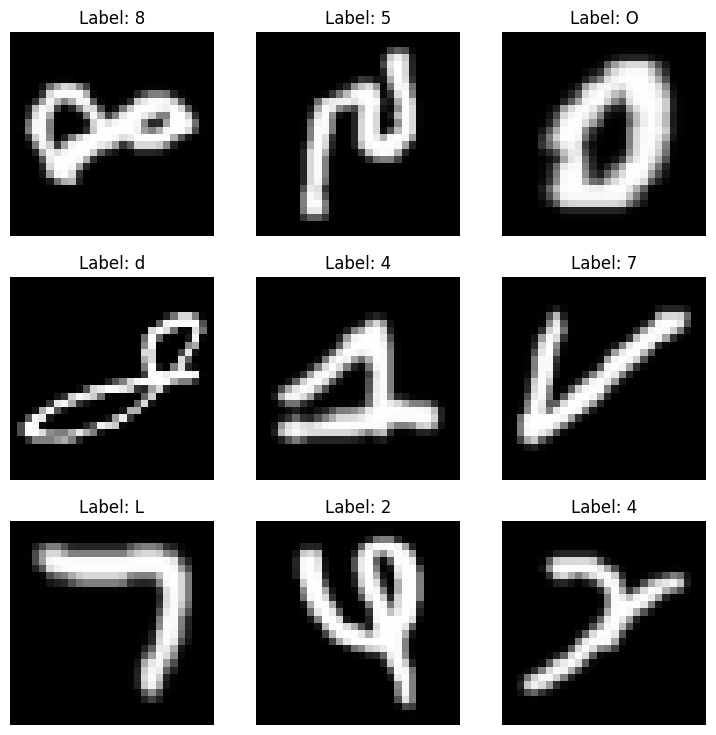

In [ ]:
fig = plt.figure(figsize=(9, 9)) # set the size of the full plot. We will use a 9x9 plot
rows = 3
cols = 3

# we will loop from 1 to the n-th index + 1
for i in range(1, rows*cols +1):
  fig.add_subplot(rows, cols, i)

  random_idx = torch.randint(0, len(train_dataset), size=[1]).item() # get a random index from the train dataset
  image, label = train_dataset[random_idx]

  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"Label: {train_class_names[label]}")
  plt.axis(False)

These training samples seem to be harder and more confusing than the ones we found on the MNIST dataset. However, we will first try to build a model without any convolution or deep layers that will attempt to recognize these images and succeed. Let's get going.

### Load data into Dataloaders

We will load the train and test datasets into dataloaders of batch size 32

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x14e687d70>,
 <torch.utils.data.dataloader.DataLoader at 0x14dedd910>)

In [ ]:
print(f"Length of train dataset: {len(train_dataset)}")
print(f"Train dataloader contains {len(train_dataloader)} batches of batch size 32 each.")
print(f"{len(train_dataloader)} * 32 = {len(train_dataloader) * 32}")

Length of train dataset: 697932
Train dataloader contains 21811 batches of batch size 32 each.
21811 * 32 = 697952


In [ ]:
print(f"Length of test dataset: {len(test_dataset)}")
print(f"Test dataloader contains {len(test_dataloader)} batches of batch size 32 each")
print(f"{len(test_dataloader)} * 32 = {len(test_dataloader) * 32}")

Length of test dataset: 116323
Test dataloader contains 3636 batches of batch size 32 each
3636 * 32 = 116352


### Create a baseline model

This model will include non-linear activation functions (ReLU) combined with linear layers.

In [ ]:
class eMnistModelv0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model_0 = eMnistModelv0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(train_class_names)
).to(device)
model_0

eMnistModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=62, bias=True)
    (4): ReLU()
  )
)

### Setup loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
import time
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(42)

epochs = 20

start_train_time_mps = time.time()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} ---")
  train_step(model=model_0,
             device=device,
             loss_fn=loss_fn,
             optimizer=optimizer,
             dataloader=train_dataloader,
             accuracy_fn=accuracy_fn)

  test_step(model=model_0,
            device=device,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

end_train_time_mps = time.time()

emnist_model_0_train_time = print_train_time(start=start_train_time_mps,
                                             end=end_train_time_mps,
                                             device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 ---
Training loss:  1.8292 | Training acc:  56.66%
Test loss:  1.6477, Test acc:  60.23%

Epoch: 1 ---
Training loss:  1.6260 | Training acc:  59.99%
Test loss:  1.6676, Test acc:  58.98%

Epoch: 2 ---
Training loss:  1.5856 | Training acc:  60.71%
Test loss:  1.5960, Test acc:  60.85%

Epoch: 3 ---
Training loss:  1.5616 | Training acc:  61.22%
Test loss:  1.5495, Test acc:  61.32%

Epoch: 4 ---
Training loss:  1.5371 | Training acc:  61.67%
Test loss:  1.5920, Test acc:  59.03%

Epoch: 5 ---
Training loss:  1.4731 | Training acc:  62.70%
Test loss:  1.5222, Test acc:  60.31%

Epoch: 6 ---
Training loss:  1.4652 | Training acc:  62.86%
Test loss:  1.4854, Test acc:  62.54%

Epoch: 7 ---
Training loss:  1.4597 | Training acc:  62.98%
Test loss:  1.5000, Test acc:  60.71%

Epoch: 8 ---
Training loss:  1.4530 | Training acc:  63.10%
Test loss:  1.4442, Test acc:  63.28%

Epoch: 9 ---
Training loss:  1.4458 | Training acc:  63.17%
Test loss:  1.4776, Test acc:  62.64%

Epoch: 10 

## Create CNN for EMNIST

This model will be based on the Tiny VGG architecture.

CNN Visualizer - https://poloclub.github.io/cnn-explainer/

In [ ]:
class eMnistConvNetv1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*100,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)
    return x

In [ ]:
device

'mps'

In [ ]:
model_1 = eMnistConvNetv1(
    input_shape=1,
    hidden_units=10,
    output_shape=len(train_class_names)
).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(42)
epochs = 20

start_train_time_on_mps = time.time()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ---")

    train_step(model=model_1,
              device=device,
              loss_fn=loss_fn,
              optimizer=optimizer,
              dataloader=train_dataloader,
              accuracy_fn=accuracy_fn)

    test_step(model=model_1,
             device=device,
             loss_fn=loss_fn,
             dataloader=test_dataloader,
             accuracy_fn=accuracy_fn)

end_train_time_on_mps = time.time()

emnist_model_1_convnet_train_time = print_train_time(start=start_train_time_on_mps,
                                                    end=end_train_time_on_mps,
                                                    device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 ---
Training loss:  0.6378 | Training acc:  79.83%
Test loss:  0.5916, Test acc:  81.16%

Epoch: 1 ---
Training loss:  0.4877 | Training acc:  83.60%
Test loss:  0.4995, Test acc:  83.78%

Epoch: 2 ---
Training loss:  0.4652 | Training acc:  84.20%
Test loss:  0.5138, Test acc:  82.39%

Epoch: 3 ---
Training loss:  0.4582 | Training acc:  84.40%
Test loss:  0.4964, Test acc:  83.39%

Epoch: 4 ---
Training loss:  0.4481 | Training acc:  84.69%
Test loss:  0.4848, Test acc:  83.59%

Epoch: 5 ---
Training loss:  0.4449 | Training acc:  84.76%
Test loss:  0.4914, Test acc:  84.06%

Epoch: 6 ---
Training loss:  0.4382 | Training acc:  84.96%
Test loss:  0.4705, Test acc:  84.23%

Epoch: 7 ---
Training loss:  0.4336 | Training acc:  85.08%
Test loss:  0.4802, Test acc:  83.97%

Epoch: 8 ---
Training loss:  0.4308 | Training acc:  85.16%
Test loss:  0.4750, Test acc:  83.99%

Epoch: 9 ---
Training loss:  0.4283 | Training acc:  85.21%
Test loss:  0.4713, Test acc:  84.46%

Epoch: 10 

In [ ]:
emnist_convnet1_results = eval_model(model=model_1,
                                    data_loader=test_dataloader,
                                    accuracy_fn=accuracy_fn,
                                    device=device,
                                    loss_fn=loss_fn)
emnist_convnet1_results

  0%|          | 0/4261 [00:00<?, ?it/s]

{'model_name': 'eMnistConvNetv1',
 'model_loss': 0.4580020308494568,
 'model_acc': 84.57741727294062}

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "EMNIST_CONVNET_1_MODEL.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/EMNIST_CONVNET_1_MODEL.pth


In [ ]:
### Load the model

In [ ]:
MODEL_SAVE_PATH

PosixPath('models/EMNIST_CONVNET_1_MODEL.pth')

In [ ]:
loaded_emnist_convnet = eMnistConvNetv1(input_shape=1,
                                        hidden_units=10,
                                       output_shape=len(train_class_names))

loaded_emnist_convnet.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_emnist_convnet.to(device)

print(f"Loaded model: {loaded_emnist_convnet}")
print(f"Model on device: {next(loaded_emnist_convnet.parameters()).device}")

Loaded model: eMnistConvNetv1(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=62, bias=True)
  )
)
Model on device: mps:0


In [ ]:
emnist_convnet_on_mnist = eval_model(model=loaded_emnist_convnet,
                                    data_loader=mnist_test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
emnist_convnet_on_mnist

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'eMnistConvNetv1',
 'model_loss': 0.18453015387058258,
 'model_acc': 94.71845047923323}

In [ ]:
!pip install torchao torchtune

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.8/606.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
## Build a deeper CNN

In [ ]:
class MnistConvNetv2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )

        self.conv_block4 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*25,
                     out_features=output_shape)
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        x = self.conv_block1(x)
        # print(f"Shape of x after 1st block: {x.shape}")
        x = self.conv_block2(x)
        # print(f"Shape of x after 2nd block: {x.shape}")
        x = self.conv_block3(x)
        # print(f"Shape of x after 3rd block: {x.shape}")
        x = self.conv_block4(x)
        # print(f"Shape of x after 4th block: {x.shape}")
        x = self.classifier(x)
        # print(f"Shape of x after classifier layer: {x.shape}")
        return x

In [ ]:
model_2 = MnistConvNetv2(input_shape=1,
                        hidden_units=64,
                        output_shape=72)
model_2

MnistConvNetv2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

In [ ]:
kmnist_train = datasets.KMNIST(root="data",
                              train=True,
                              transform=ToTensor(),
                              target_transform=None,
                              download=True)
kmnist_test = datasets.KMNIST(root="data",
                             train=False,
                             transform=ToTensor(),
                             target_transform=None,
                             download=True)

In [ ]:
kmnist_train, kmnist_test

(Dataset KMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset KMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
kmnist_train.classes

['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']

In [ ]:
import torchtune
from torchtune.datasets import ConcatDataset

In [ ]:
mnist_train, mnist_test

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
len(mnist_train.classes) + len(train_dataset.classes) + len(kmnist_train.classes)

82

In [ ]:
train_dataset, test_dataset

(Dataset EMNIST
     Number of datapoints: 697932
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset EMNIST
     Number of datapoints: 116323
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
concat_mnist_train_dataset = ConcatDataset([mnist_train, train_dataset, kmnist_train])
concat_mnist_test_dataset = ConcatDataset([mnist_test, test_dataset, kmnist_test])

In [ ]:
len(concat_mnist_train_dataset), len(concat_mnist_test_dataset)

(817932, 136323)

In [ ]:
train_dataloader = DataLoader(dataset=concat_mnist_train_dataset,
                             batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=concat_mnist_test_dataset,
                            batch_size=32,
                            shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x32481dd60>,
 <torch.utils.data.dataloader.DataLoader at 0x32481b320>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)
model_2.to(device)

MnistConvNetv2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

In [ ]:
torch.manual_seed(42)
epochs = 3

start_train_time_on_mps = time.time()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ---")

    train_step(model=model_2,
              dataloader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

    test_step(model=model_2,
             dataloader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

end_train_time_on_mps = time.time()

train_time_model_2_mnist = print_train_time(start=start_train_time_on_mps,
                                           end=end_train_time_on_mps,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ---
Training loss:  1.0666 | Training acc:  69.11%
Test loss:  0.3877, Test acc:  86.33%

Epoch: 1 ---
Training loss:  0.3451 | Training acc:  87.39%
Test loss:  0.3460, Test acc:  87.49%

Epoch: 2 ---


KeyboardInterrupt: 

In [ ]:
32*25

800

In [ ]:
MODEL_NAME = "MNIST_CONVNET_2_MODEL.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/MNIST_CONVNET_2_MODEL.pth


In [ ]:
mnist_convnet_2_results = eval_model(model=model_2,
                                    data_loader=test_dataloader,
                                    accuracy_fn=accuracy_fn,
                                    loss_fn=loss_fn,
                                    device=device)
mnist_convnet_2_results

  0%|          | 0/4261 [00:00<?, ?it/s]

{'model_name': 'MnistConvNetv2',
 'model_loss': 0.3419848382472992,
 'model_acc': 87.5031780489713}

In [ ]:
## Compare model results and training time

In [ ]:
mnist_results = pd.DataFrame([mnist_test_results, emnist_convnet1_results, mnist_convnet_2_results])
mnist_results

,model_name,model_loss,model_acc
0,MNISTModelV1,0.038657,98.702077
1,eMnistConvNetv1,0.458002,84.577417
2,MnistConvNetv2,0.341985,87.503178


In [ ]:
test_dataset

Dataset EMNIST
    Number of datapoints: 116323
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
## Make and evaluate random predictions

In [ ]:
len(concat_mnist_test_dataset)

136323

In [ ]:
### Make predictions on mnist test data

In [ ]:
MODEL_PATH = Path("models")
MODEL_NAME = "MNIST_CONVNET_2_MODEL.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:
loaded_model_2 = MnistConvNetv2(input_shape=1,
                               hidden_units=64,
                               output_shape=72)
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)

print(f"Loaded model_2 on: {next(loaded_model_2.parameters()).device}")

Loaded model_2 on: mps:0


In [ ]:
from tqdm.auto import tqdm

y_preds = []
loaded_model_2.eval()

with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)
        y_logit = loaded_model_2(X)
        y_pred_probs = torch.softmax(y_logit, dim=1)
        y_pred = y_pred_probs.argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/3636 [00:00<?, ?it/s]